In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV
# importing required libraries

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [54]:
df_train = pd.read_csv("train.csv")
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [55]:
df_train.shape

(54808, 14)

In [57]:
df_test = pd.read_csv("test.csv")

df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [58]:
drop_train = df_train.drop(["employee_id", "age","recruitment_channel","length_of_service","is_promoted"] , axis = 1)
drop_train.head()

,department,region,education,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,1,5.0,1,0,49
1,Operations,region_22,Bachelor's,m,1,5.0,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,1,3.0,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,2,1.0,0,0,50
4,Technology,region_26,Bachelor's,m,1,3.0,0,0,73


In [59]:
drop_test = df_test.drop(["employee_id","recruitment_channel", "age","length_of_service"] , axis = 1)
drop_test.head()

,department,region,education,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,1,NaN,1,0,77
1,HR,region_4,Bachelor's,f,1,3.0,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,1,1.0,0,0,47
3,Procurement,region_2,Bachelor's,f,3,2.0,0,0,65
4,Finance,region_29,Bachelor's,m,1,4.0,0,0,61


In [60]:
drop_train.loc[(drop_train.previous_year_rating.isna()) & (drop_train["KPIs_met >80%"] == 1) , "previous_year_rating"] = 5 
drop_train.loc[(drop_train.previous_year_rating.isna()) & (drop_train["KPIs_met >80%"] == 0) , "previous_year_rating"] = 1

In [61]:
drop_train.isna().sum()

department                 0
region                     0
education               2409
gender                     0
no_of_trainings            0
previous_year_rating       0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [62]:
drop_train.loc[(df_train.age >=39.35) & (df_train.education.isna()), "education"] = "Master's & above"
drop_train.loc[(df_train.age >=23.83)& (df_train.age<39.35) & df_train.education.isna(), "education"] ="Bachelor's"
drop_train.loc[(df_train.age < 23.83) & (df_train.education.isna()), "education" ] ="Below Secondary"


In [63]:
drop_train.isna().sum()

department              0
region                  0
education               0
gender                  0
no_of_trainings         0
previous_year_rating    0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [64]:
dic = {"Bachelor's" : 2 ,"Master's & above" : 3 , "Below Secondary" : 1}
drop_train["education_encoded"] = drop_train.education.map(dic)
drop_train.head()

,department,region,education,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,education_encoded
0,Sales & Marketing,region_7,Master's & above,f,1,5.0,1,0,49,3
1,Operations,region_22,Bachelor's,m,1,5.0,0,0,60,2
2,Sales & Marketing,region_19,Bachelor's,m,1,3.0,0,0,50,2
3,Sales & Marketing,region_23,Bachelor's,m,2,1.0,0,0,50,2
4,Technology,region_26,Bachelor's,m,1,3.0,0,0,73,2


In [65]:
drop_train.isna().sum()

department              0
region                  0
education               0
gender                  0
no_of_trainings         0
previous_year_rating    0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
education_encoded       0
dtype: int64

In [66]:
drop_test.loc[drop_test.previous_year_rating.isna() & drop_test["KPIs_met >80%"] == 1 , "previous_year_rating"] = 5
drop_test.loc[drop_test.previous_year_rating.isna() & drop_test["KPIs_met >80%"] == 0 , "previous_year_rating"] = 1
drop_test.isna().sum()

department                 0
region                     0
education               1034
gender                     0
no_of_trainings            0
previous_year_rating       0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [67]:

drop_test.loc[(df_test.age >=39.35) & (df_test.education.isna()), "education"] = "Master's & above"
drop_test.loc[(df_test.age >=23.83)& (df_test.age<39.35) & df_test.education.isna(), "education"] ="Bachelor's"
drop_test.loc[(df_test.age < 23.83) & (df_test.education.isna()), "education" ] ="Below Secondary"
drop_test.isna().sum()

department              0
region                  0
education               0
gender                  0
no_of_trainings         0
previous_year_rating    0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [68]:
dic = {"Bachelor's" : 2 ,"Master's & above" : 3 , "Below Secondary" : 1}
drop_test["education_encoded"] = drop_test.education.map(dic)
drop_test.head()

,department,region,education,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,education_encoded
0,Technology,region_26,Bachelor's,m,1,1.0,1,0,77,2
1,HR,region_4,Bachelor's,f,1,1.0,0,0,51,2
2,Sales & Marketing,region_13,Bachelor's,m,1,1.0,0,0,47,2
3,Procurement,region_2,Bachelor's,f,3,1.0,0,0,65,2
4,Finance,region_29,Bachelor's,m,1,1.0,0,0,61,2


In [69]:
drop_train.dtypes

department               object
region                   object
education                object
gender                   object
no_of_trainings           int64
previous_year_rating    float64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
education_encoded         int64
dtype: object

In [70]:
drop_train.isna().sum()

department              0
region                  0
education               0
gender                  0
no_of_trainings         0
previous_year_rating    0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
education_encoded       0
dtype: int64

In [71]:
drop_train = drop_train.drop(["education"] , axis = 1)
drop_test = drop_test.drop(["education"] , axis = 1)

In [72]:
drop_train.head()

,department,region,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,education_encoded
0,Sales & Marketing,region_7,f,1,5.0,1,0,49,3
1,Operations,region_22,m,1,5.0,0,0,60,2
2,Sales & Marketing,region_19,m,1,3.0,0,0,50,2
3,Sales & Marketing,region_23,m,2,1.0,0,0,50,2
4,Technology,region_26,m,1,3.0,0,0,73,2


In [73]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ["department" ,"region"  ,"gender" ]),
    remainder='passthrough')


In [74]:
df_train_old = df_train.is_promoted

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(drop_train,df_train_old , test_size=0.4, random_state=0)


In [76]:
X_train.head()

,department,region,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,education_encoded
41438,Analytics,region_22,m,1,5.0,0,0,84,2
42120,Sales & Marketing,region_2,m,1,3.0,1,0,46,2
39719,Procurement,region_27,m,3,1.0,1,1,72,2
37142,Analytics,region_2,m,1,5.0,1,0,83,2
40764,Sales & Marketing,region_3,m,1,2.0,0,0,45,3


#Choose all predictors except target & IDcols
predictors = [x for x in drop_train.columns]
print(predictors)
feat_imp = pd.Series(clf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [25]:
X_train.head()

,department,region,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,age_m_lengthofservice,education_encoded
41438,Analytics,region_22,m,1,5.0,0,0,84,168,2
42120,Sales & Marketing,region_2,m,1,3.0,1,0,46,72,2
39719,Procurement,region_27,m,3,1.0,1,1,72,155,2
37142,Analytics,region_2,m,1,5.0,1,0,83,111,2
40764,Sales & Marketing,region_3,m,1,2.0,0,0,45,462,3


In [26]:
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

pipe = make_pipeline(column_trans, model)
pipe.fit(drop_train, df_train.is_promoted)



Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['department', 'region',
                                                   'gender'])],
                                   verbose=False)),
                ('gradientbo...
                                        

In [27]:
# predict the target on the train dataset
predict_train = pipe.predict(X_train)
print('\nTarget on train data',predict_train) 


# predict the target on the test dataset
predict_test = pipe.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = f1_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on train data [0 0 0 ... 0 0 0]

Target on test data [0 0 0 ... 0 0 0]

accuracy_score on test dataset :  0.5368754956383822


In [28]:
prediction = pipe.predict(drop_test)
pred = pd.DataFrame(prediction)
predm = pred.rename({0: "is_promoted"}, axis= 1)
predm.index = df_test.employee_id
predm.to_csv("predictions.csv")

# Tuning n_estimator(The number of sequential trees to be modeled )

In [29]:

param_test1 = {'n_estimators':range(400,600,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=5)
pipe = make_pipeline(column_trans, gsearch1)
pipe.fit(drop_train, df_train_old)

E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['department', 'region',
                                                   'gender'])],
                                   verbose=False)),
                ('gridsearch...
                                        

In [30]:
# examine the best model
print(gsearch1.best_score_)
print(gsearch1.best_params_)
print(gsearch1.best_estimator_)

0.5057533350800714
{'n_estimators': 580}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=500,
                           min_weight_fraction_leaf=0.0, n_estimators=580,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [31]:
# print the array of mean scores only
grid_mean_scores = gsearch1.cv_results_['mean_test_score']
print(grid_mean_scores)
print(param_test1)

[0.50434743 0.50450359 0.5044987  0.50424664 0.50424751 0.50440315
 0.50448989 0.50495064 0.50564982 0.50563237 0.50502303 0.50549415
 0.50563865 0.50548491 0.50517035 0.50568621 0.50515101 0.50560853
 0.50575334 0.50560654]
{'n_estimators': range(400, 600, 10)}


Text(0, 0.5, 'Cross-Validated Accuracy')

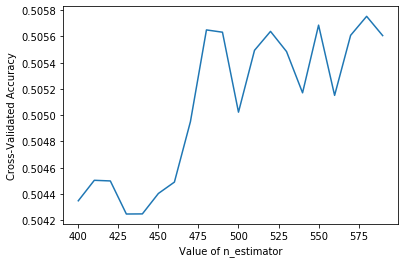

In [32]:
import matplotlib.pyplot as plt
# plot the results
plt.plot(range(400,600,10), grid_mean_scores)
plt.xlabel('Value of n_estimator')
plt.ylabel('Cross-Validated Accuracy')

# Tuning tree-specific parameters


In [33]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=5)
pipe = make_pipeline(column_trans, gsearch2)
pipe.fit(drop_train, df_train_old)


E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['department', 'region',
                                                   'gender'])],
                                   verbose=False)),
                ('gridsearch...
                                        

In [34]:
# print the array of mean scores only

grid_mean_scores = gsearch2.cv_results_['mean_test_score']
print(grid_mean_scores.size)
range(5,16,2).count

30


<function range.count>

In [35]:
# examine the best model
print(gsearch2.best_score_)
print(gsearch2.best_params_)
print(gsearch2.best_estimator_)

0.5080523722115723
{'max_depth': 15, 'min_samples_split': 200}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=15,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [36]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test3, scoring='f1',n_jobs=4,iid=False, cv=5)
pipe = make_pipeline(column_trans, gsearch3)
pipe.fit(drop_train, df_train_old)

E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['department', 'region',
                                                   'gender'])],
                                   verbose=False)),
                ('gridsearch...
                                        

In [37]:
grid_mean_scores = gsearch3.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.43931864 0.43125073 0.42699188 0.42667106 0.43106323 0.41446389
 0.42767064 0.43511059 0.42891431 0.42842303 0.40659635 0.4122382
 0.43355279 0.42010363 0.42911198 0.43226652 0.42077973 0.41567983
 0.43158502 0.42870168 0.41567473 0.42158356 0.41393135 0.40401977
 0.4352518  0.41585672 0.42012955 0.42189948 0.42161501 0.42480769]


In [38]:
# examine the best model
print(gsearch3.best_score_)
print(gsearch3.best_params_)
print(gsearch3.best_estimator_)

0.4393186363024938
{'min_samples_leaf': 30, 'min_samples_split': 1000}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [39]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=5)
pipe = make_pipeline(column_trans, gsearch4)
pipe.fit(drop_train, df_train_old)


E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['department', 'region',
                                                   'gender'])],
                                   verbose=False)),
                ('gridsearch...
                                        

In [40]:
# examine the best model
print(gsearch4.best_score_)
print(gsearch4.best_params_)
print(gsearch4.best_estimator_)

0.48469031366883664
{'max_features': 19}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=19, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# Randomized_grid_search

In [41]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = {'n_estimators':range(400,600,10), 'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200) , 'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10),'max_features':range(7,20,2)}

In [42]:
# n_iter controls the number of searches
model =GradientBoostingClassifier(learning_rate=0.1,max_features='sqrt',subsample=0.8,random_state=10)
rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='f1', n_iter=10, random_state=5, return_train_score=False)
pipe = make_pipeline(column_trans, rand)
pipe.fit(drop_train, df_train_old)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.502387,0.019219,"{'n_estimators': 550, 'min_samples_split': 120..."
1,0.508861,0.017903,"{'n_estimators': 580, 'min_samples_split': 120..."
2,0.508275,0.015233,"{'n_estimators': 430, 'min_samples_split': 160..."
3,0.507832,0.019103,"{'n_estimators': 460, 'min_samples_split': 140..."
4,0.508695,0.018483,"{'n_estimators': 500, 'min_samples_split': 120..."
5,0.508482,0.019792,"{'n_estimators': 400, 'min_samples_split': 100..."
6,0.505161,0.020025,"{'n_estimators': 520, 'min_samples_split': 160..."
7,0.502720,0.018282,"{'n_estimators': 400, 'min_samples_split': 120..."
8,0.505596,0.016369,"{'n_estimators': 430, 'min_samples_split': 120..."
9,0.505929,0.020272,"{'n_estimators': 420, 'min_samples_split': 160..."


In [43]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.5088609907197388
{'n_estimators': 580, 'min_samples_split': 1200, 'min_samples_leaf': 30, 'max_features': 13, 'max_depth': 13}


In [45]:
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=580 ,max_depth = 9, min_samples_split=1200, min_samples_leaf=30, max_features = 13 )
pipe = make_pipeline(column_trans, model)
pipe.fit(drop_train, df_train.is_promoted)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['department', 'region',
                                                   'gender'])],
                                   verbose=False)),
                ('gradientbo...
                                        

In [47]:
# predict the target on the train dataset
predict_train = pipe.predict(X_train)
print('\nTarget on train data',predict_train) 


# predict the target on the test dataset
predict_test = pipe.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = f1_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on train data [0 0 0 ... 0 0 0]

Target on test data [0 0 0 ... 0 0 0]

accuracy_score on test dataset :  0.5704361250482439


In [48]:
prediction = pipe.predict(drop_test)
pred = pd.DataFrame(prediction)
predm = pred.rename({0: "is_promoted"}, axis= 1)
predm.index = df_test.employee_id
predm.to_csv("predictions.csv")